# Explore extracting melody
Since Fri. Nov. 23rd, 2021


`music21` has better support on extracting melody, given low-level music note support,
and it seems to work better with Music XML files.



## Setup



In [1]:
import pandas as pd
import music21 as m21
from icecream import ic

from util import *
from util import MidoUtil as Mu, PrettyMidiUtil as Pmu
from melody_extractor import MxlMelodyExtractor


songs = eg_songs(fmt='MXL')
ic(songs)



ic| songs: ['/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MXL-eg/Ed '
            'Sheeran - Shape of You (Carlo Prato).mxl',
            '/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MXL-eg/Joe '
            'Hisaishi - Merry Go Round of Life (bitmidi).mxl',
            '/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MXL-eg/Merry '
            'Go Round, no Voice.mxl',
            '/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MXL-eg/Merry '
            'Go Round, with Voice.mxl']


['/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MXL-eg/Ed Sheeran - Shape of You (Carlo Prato).mxl',
 '/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MXL-eg/Joe Hisaishi - Merry Go Round of Life (bitmidi).mxl',
 '/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MXL-eg/Merry Go Round, no Voice.mxl',
 '/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MXL-eg/Merry Go Round, with Voice.mxl']

## Get the bar with maximum average pitch


### Merry Go Round of Life


In [2]:
fnm = eg_songs(k='Merry Go Round', fmt='MXL')
ic(fnm)
scr = m21.converter.parse(fnm)
me = MxlMelodyExtractor(fnm)



ic| fnm: ('/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MXL-eg/Joe '
          'Hisaishi - Merry Go Round of Life (bitmidi).mxl')


#### Implementation sanity check
Replace Chords with Notes



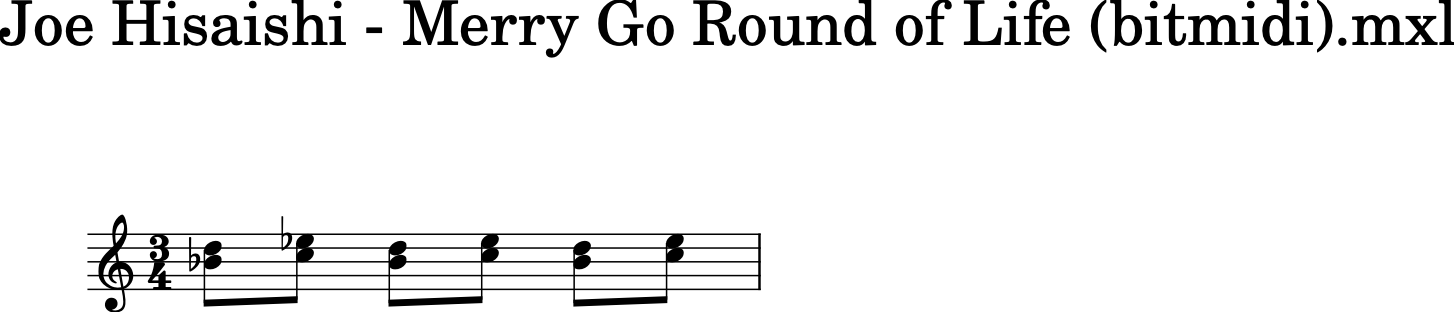

ic| list(bar): [<music21.chord.Chord B-4 D5>,
                <music21.chord.Chord C5 E-5>,
                <music21.chord.Chord B-4 D5>,
                <music21.chord.Chord C5 E-5>,
                <music21.chord.Chord B-4 D5>,
                <music21.chord.Chord C5 E-5>]
ic| [p.octave for p in note.pitches]: [4, 5]
ic| [p.octave for p in note.pitches]: [5, 5]
ic| [p.octave for p in note.pitches]: [4, 5]
ic| [p.octave for p in note.pitches]: [5, 5]
ic| [p.octave for p in note.pitches]: [4, 5]
ic| [p.octave for p in note.pitches]: [5, 5]


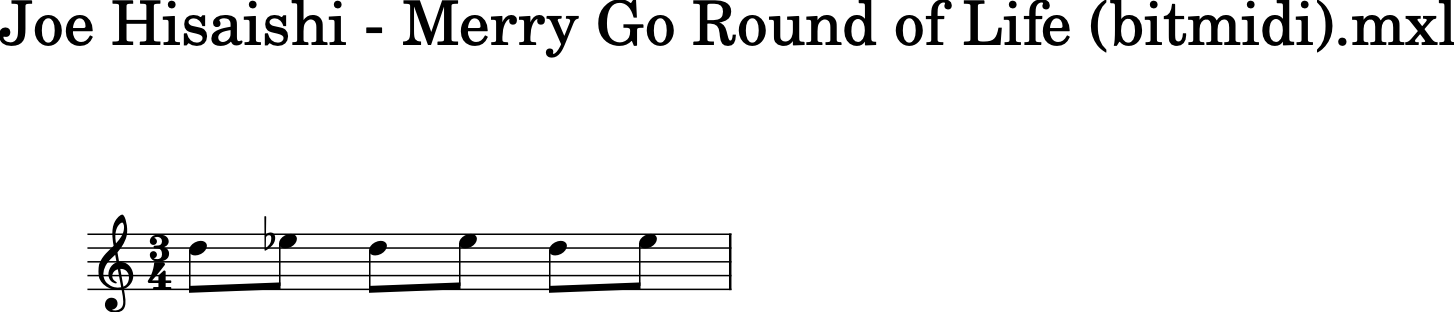

ic| note: <music21.note.Note D>, note.octave: 5
ic| note: <music21.note.Note E->, note.octave: 5
ic| note: <music21.note.Note D>, note.octave: 5
ic| note: <music21.note.Note E->, note.octave: 5
ic| note: <music21.note.Note D>, note.octave: 5
ic| note: <music21.note.Note E->, note.octave: 5


In [3]:
bar = scr.parts[1].measure(2)
bar.show()
ic(list(bar))

for note in bar.notes:
    ic([p.octave for p in note.pitches])
    # ic(note.pitch.octave)
    if isinstance(note, m21.chord.Chord):
        bar.replace(note, max(note.notes, key=lambda n: n.pitch.frequency))

bar.show()
for note in bar:
    ic(note, note.octave)


Average of pitch
Looks like using frequency has less drastic channel switch, compared to midi representation
Voice incorporated



ic| method: 'fqs'
ic| df.head(5):    Violin, CH #1  Piano, CH #2  Piano, CH #3  Piano, CH #4
                0           -inf          -inf          -inf          -inf
                1           -inf          -inf          -inf          -inf
                2           -inf    604.791752          -inf          -inf
                3           -inf    555.290333          -inf          -inf
                4           -inf    494.707446          -inf          -inf
ic| method: 'midi'
ic| df.head(5):    Violin, CH #1  Piano, CH #2 Piano, CH #3  Piano, CH #4
                0           -inf          -inf         -inf          -inf
                1           -inf          -inf         -inf          -inf
                2           -inf          74.5         -inf          -inf
                3           -inf          73.0         -inf          -inf
                4           -inf          71.0         -inf          -inf


[{'Violin, CH #1': -inf,
  'Piano, CH #2': -inf,
  'Piano, CH #3': -inf,
  'Piano, CH #4': -inf},
 {'Violin, CH #1': -inf,
  'Piano, CH #2': -inf,
  'Piano, CH #3': -inf,
  'Piano, CH #4': -inf},
 {'Violin, CH #1': -inf,
  'Piano, CH #2': 74.5,
  'Piano, CH #3': -inf,
  'Piano, CH #4': -inf},
 {'Violin, CH #1': -inf,
  'Piano, CH #2': 73.0,
  'Piano, CH #3': -inf,
  'Piano, CH #4': -inf},
 {'Violin, CH #1': -inf,
  'Piano, CH #2': 71.0,
  'Piano, CH #3': -inf,
  'Piano, CH #4': -inf},
 {'Violin, CH #1': -inf,
  'Piano, CH #2': 66.66666666666667,
  'Piano, CH #3': -inf,
  'Piano, CH #4': -inf},
 {'Violin, CH #1': -inf,
  'Piano, CH #2': 29.666666666666668,
  'Piano, CH #3': -inf,
  'Piano, CH #4': -inf},
 {'Violin, CH #1': -inf,
  'Piano, CH #2': 60.333333333333336,
  'Piano, CH #3': -inf,
  'Piano, CH #4': -inf},
 {'Violin, CH #1': -inf,
  'Piano, CH #2': 68.5,
  'Piano, CH #3': -inf,
  'Piano, CH #4': -inf},
 {'Violin, CH #1': -inf,
  'Piano, CH #2': 74.0,
  'Piano, CH #3': 41.3333333

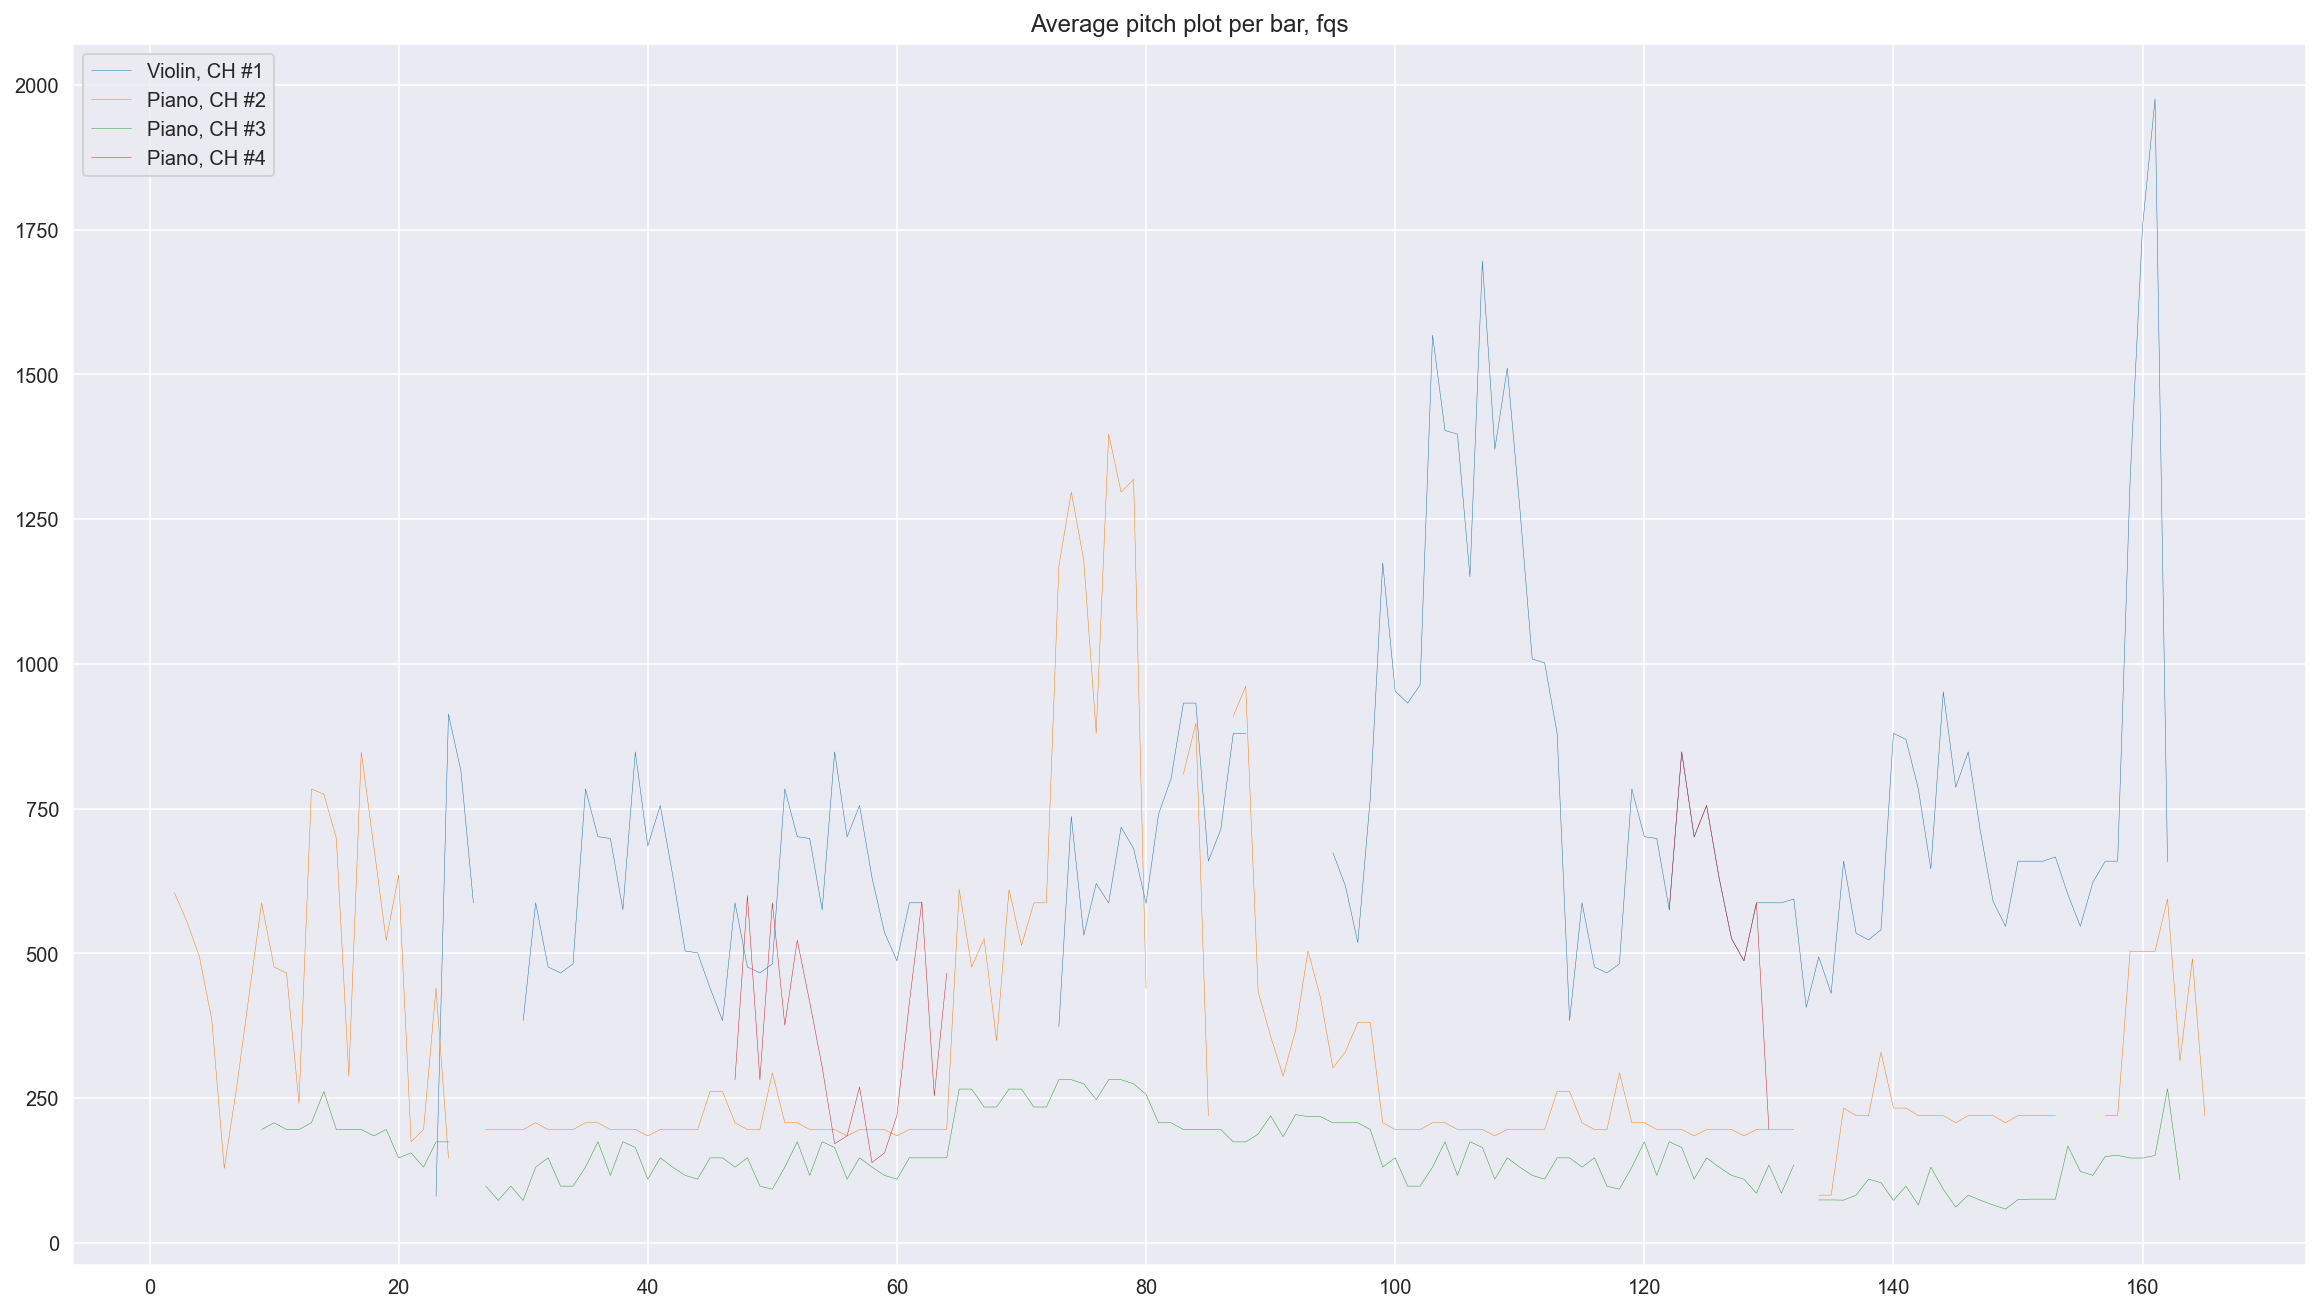

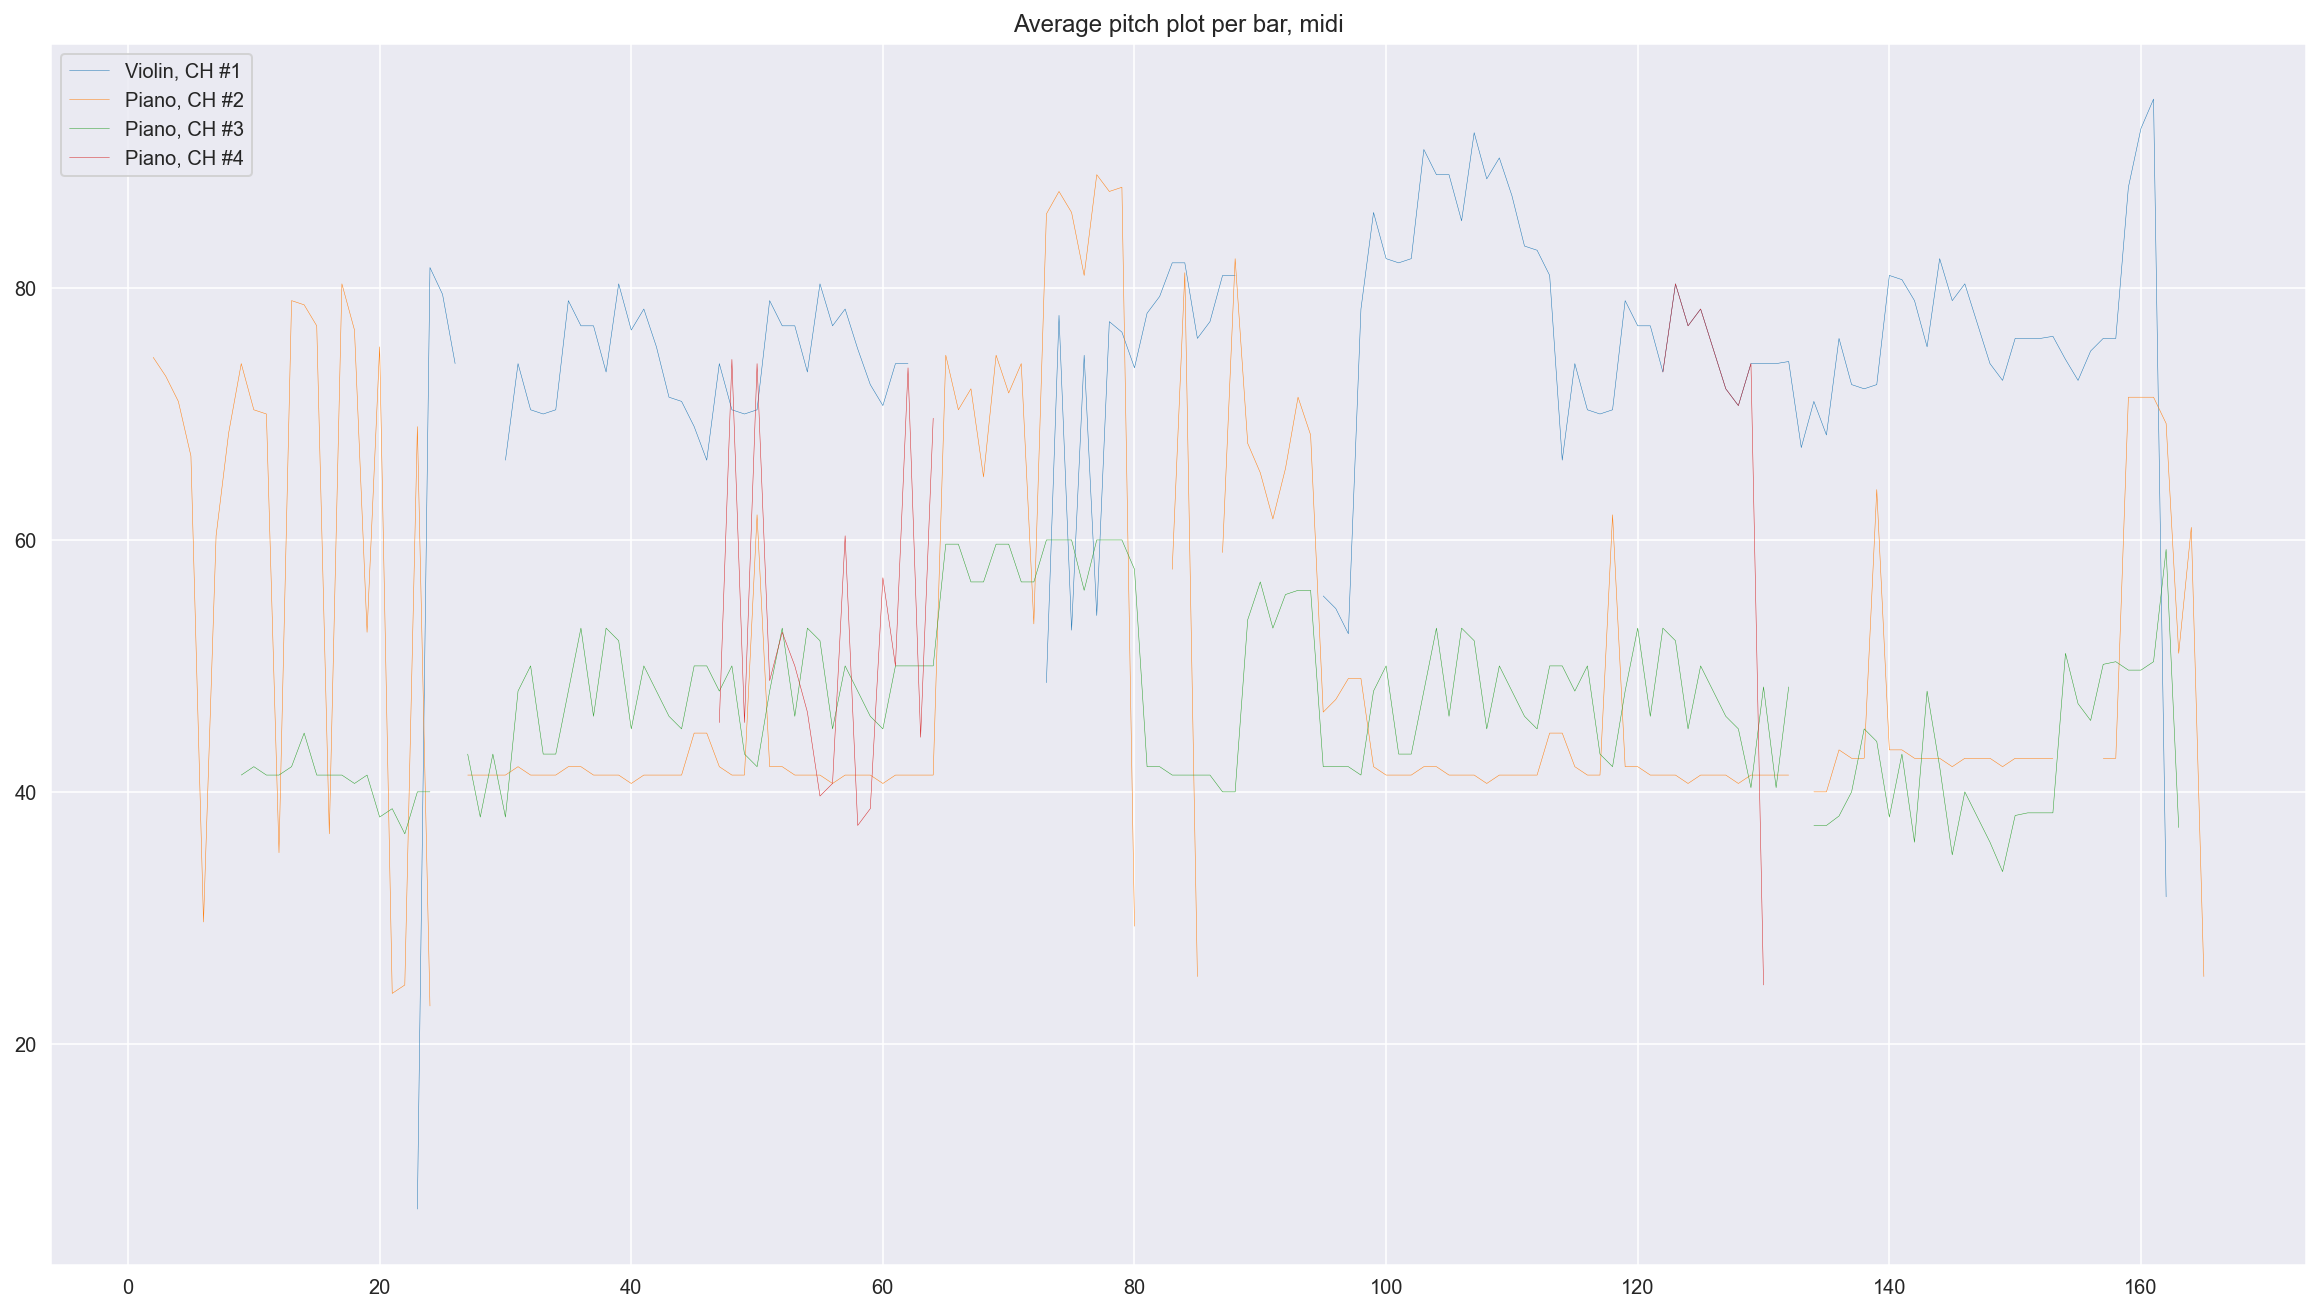

In [4]:
def plot(method='fqs'):
    ic(method)
    pchs = [vb.single().avg_pitch(method=method) for vb in me.vertical_bars]

    df = pd.DataFrame(pchs)
    ic(df.head(5))
    # ic(df['Piano, CH #2'])
    df.replace([-np.inf], np.nan, inplace=True)
    df.plot(
        figsize=(16, 9),
        lw=0.25, ms=0.3,
        title=f'Average pitch plot per bar, {method}'
    )
    return pchs

pchs = plot(method='fqs')
plot(method='midi')



Which track to pick, in case of pitch tie?
We observe cases around bars 120+



ic| pnm: 'Violin, CH #1'


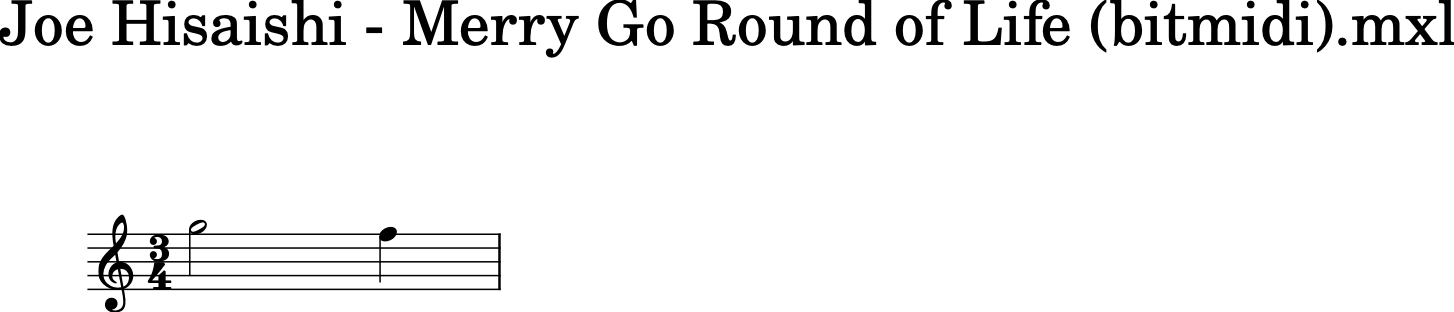

ic| pnm: 'Piano, CH #2'


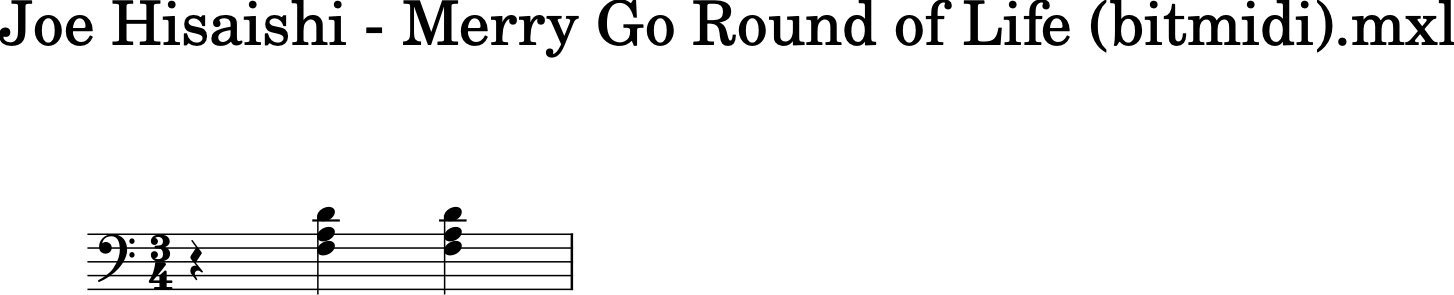

ic| pnm: 'Piano, CH #3'


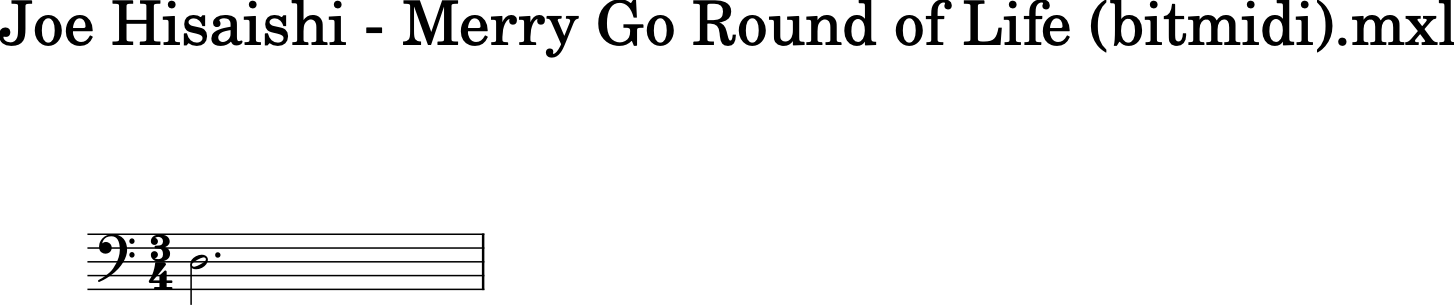

ic| pnm: 'Piano, CH #4'


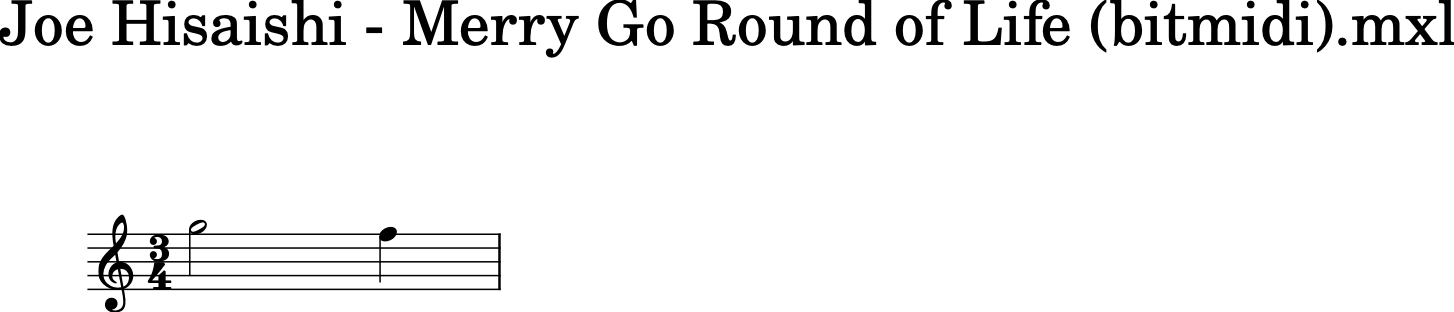

In [5]:
n = 125
vb = me.vertical_bars[n]

# `Violin, CH #1` and `Piano, CH #4` shares exactly the same measure content,
# # for simplicity, break ties arbitrarily
for pnm, bar in vb.bars.items():
    ic(pnm)
    bar.show()



Have just one, global tempo, as the weighted mean of all tempo changes


In [6]:
for p in scr.parts:
    bars_with_tempo = filter(lambda b: b[m21.tempo.MetronomeMark], p[m21.stream.Measure])
    for b in bars_with_tempo:
        ic(b.number, list(b))


ic| b.number: 0
    list(b): [<music21.layout.SystemLayout>,
              <music21.clef.TrebleClef>,
              <music21.tempo.MetronomeMark Quarter=240.0>,
              <music21.key.KeySignature of 1 flat>,
              <music21.meter.TimeSignature 3/4>,
              <music21.note.Rest dotted-half>]
ic| b.number: 1
    list(b): [<music21.tempo.MetronomeMark Quarter=104.0>, <music21.note.Rest dotted-half>]
ic| b.number: 4
    list(b): [<music21.note.Rest dotted-half>,
              <music21.tempo.MetronomeMark maestoso Quarter=88.0>]
ic| b.number: 5
    list(b): [<music21.tempo.MetronomeMark Quarter=172.0>,
              <music21.note.Rest dotted-half>,
              <music21.tempo.MetronomeMark vivacissimo Quarter=166.0>,
              <music21.tempo.MetronomeMark Quarter=163.0>,
              <music21.tempo.MetronomeMark vivace Quarter=159.0>,
              <music21.tempo.MetronomeMark Quarter=152.0>,
              <music21.tempo.MetronomeMark molto allegro Quarter=145.0>,
   

#### Output


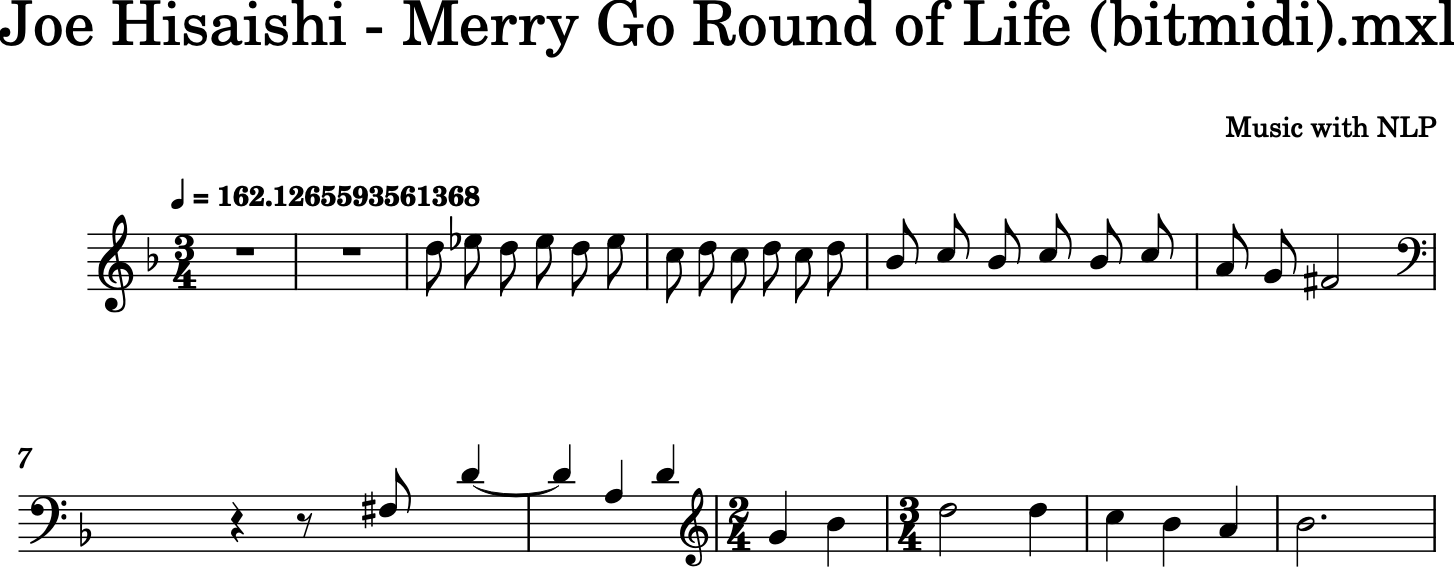

In [7]:
scr = me.bar_with_max_pitch()
scr.show()

